In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [146]:
#let's load the dataset
fifa_dataset = pd.read_csv('datasets/fifa dataset.csv')
world_cup = pd.read_csv('datasets/World Cup 2018 Dataset.csv')

In [147]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [148]:
fifa_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [149]:
#Add winning team and goal difference
winner= []

for counter in range(len(fifa_dataset['date'])):
    if(fifa_dataset['home_score'][counter] > fifa_dataset['away_score'][counter]):
        winner.append(fifa_dataset['home_team'][counter])
    elif (fifa_dataset['home_score'][counter] < fifa_dataset['away_score'][counter]):
        winner.append(fifa_dataset['away_team'][counter])
    else:
        winner.append('Draw')

fifa_dataset['winner'] = winner

fifa_dataset['goal_difference'] = np.absolute(fifa_dataset['home_score'] - fifa_dataset['away_score'])


In [150]:
fifa_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


In [151]:
# let's work for a single team first and later expand to the other teams
# let's select Argentina

df = fifa_dataset[(fifa_dataset['home_team'] == 'Argentina') | (fifa_dataset['away_team'] == 'Argentina')]
argentina = df.iloc[:]
argentina.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference
144,1902-07-20,Uruguay,Argentina,0,6,Friendly,Montevideo,Uruguay,False,Argentina,6
152,1903-09-13,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,Uruguay,1
173,1905-08-15,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,Draw,0
184,1906-08-15,Uruguay,Argentina,0,2,Copa Lipton,Montevideo,Uruguay,False,Argentina,2
186,1906-10-21,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,Argentina,1


In [152]:
# pick all the games played after 1930 since first world cup was played in 1930
year = []
for row in argentina['date']:
    year.append(int(row[:4]))
argentina['match_year'] = year
argentina_1930 = argentina[argentina.match_year >= 1930]
argentina_1930.reset_index(inplace=True)
argentina_1930.head()

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference,match_year
0,1259,1930-05-25,Argentina,Uruguay,1,1,Copa Newton,Buenos Aires,Argentina,False,Draw,0,1930
1,1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,1,1930
2,1287,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,Argentina,3,1930
3,1292,1930-07-22,Argentina,Chile,3,1,FIFA World Cup,Montevideo,Uruguay,True,Argentina,2,1930
4,1294,1930-07-26,Argentina,USA,6,1,FIFA World Cup,Montevideo,Uruguay,True,Argentina,5,1930


In [153]:
#for i in range(len(argentina_1930['winner'])):
    #if (argentina_1930['winner'][i] != 'Argentina') and (argentina_1930['winner'][i] != 'Draw') :
        #argentina_1930['winner'][i] = 'Lose'
#argentina_1930['winner'].head(10)
#argentina_1930['winner'][1]
mask = argentina_1930.winner != 'Argentina'
column_name = 'winner'
argentina_1930.loc[mask , column_name] = 'Lose'

c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


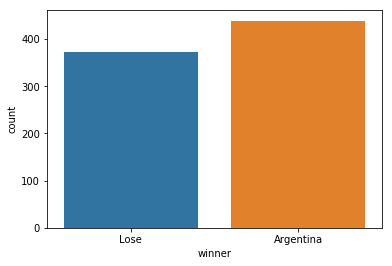

In [154]:
ax = sns.countplot(x="winner", data=argentina_1930)

In [155]:
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']

In [156]:
df_teams_home = fifa_dataset[fifa_dataset['home_team'].isin(worldcup_teams)]
df_teams_away = fifa_dataset[fifa_dataset['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               20778
home_team          20778
away_team          20778
home_score         20778
away_score         20778
tournament         20778
city               20778
country            20778
neutral            20778
winner             20778
goal_difference    20778
dtype: int64

In [157]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,England,1


In [158]:
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,goal_difference,match_year
1230,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Spain,1,1930
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,Portugal,2,1930
1238,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Italy,2,1930
1240,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,Draw,0,1930


In [159]:
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,winner
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


In [163]:
df_teams_1930 = df_teams_1930.reset_index(drop=True)

mask1 = df_teams_1930.winner == df_teams_1930.home_team
col_name1 = 'winner'
mask2 = df_teams_1930.winner == 'Draw'
col_name2 = 'winner'
mask3 = df_teams_1930.winner == df_teams_1930.away_team
col_name3 = 'winner'


df_teams_1930.loc[mask1,col_name1]=2
df_teams_1930.loc[mask2,col_name2]=1
df_teams_1930.loc[mask3,col_name3]=0

df_teams_1930.head()

,home_team,away_team,winner
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2
